# Análise descritiva dos dados tratados

O presente script está compostos por funções que auxiliam no agrupamento de funcionalidades para realizar a análise descritiva

| O presente *script* foi feito por [Amanda Souza](https://www.linkedin.com/in/amanda-rs/) para o Ada Hack de 2024.

## Importações das bibliotecas

Para a elaboração do *script* foi utilizado o Python 3.11.9

In [1]:
import pandas as pd # para manipulação de dataframes
import matplotlib.pyplot as plt # elaboração de gráficos
import seaborn as sns # para elaboração de gráficos
import geopandas as gpd # para utilização de dados geocalizados

## Funções

### Ajustes de nomes das caterogias e colunas

Ajustes para exibir os dados sem a falta de acentos e abreviações

In [2]:
def ajustes_nomes(data):
    """Ajustes em variáveis para melhor exibição dos resultados
    - A coluna 'Genero' foi trocado para 'Gênero' 
    - Os valores Fem e Masc foram trocados por Feminino e Masculino
    - O valor Pós graduação foi trocado por Pós-graduação (correção ortográfica)

    Args:
        data (dataframe): a base de dados de funcionários

    Returns:
        data (dataframe): a base de dados de funcionários com os nomes melhorados
    """
    # Retirando abreviações nos gêneros
    data["Genero"] = data["Genero"].map({"Fem": "Feminino", "Masc": "Masculino"})
    # Renomeando a coluna 'Genero' para 'Gênero'
    data.rename(columns={"Genero": "Gênero"}, inplace=True)
    # correção ortográfica
    data['Formação'] = data['Formação'].replace('Pós graduação', 'Pós-graduação')
    
    return data

### Análise de Qualidade da base
A função mostra na tela as seguintes informações:
- Quantidade de registros
- Categorias
- Valores faltantes

In [3]:
def analise_base(data):
    """
    A função informa na tela informações sobre a qualidade dos dados
    
    Args:
        data (dataframe): a base de dados de funcionários
    """
    total_linhas = len(data) # contando a quantidade de regitros

    print(f'A Base de Dados disponível tem {total_linhas} registros.\n')

    # Estatísticas descritivas para as colunas numéricas
    print("\nEstatísticas descritivas para as colunas numéricas:")
    print(data[['Idade','Tempo de casa','Idade Ingresso']].describe().round(2))

    #informando na tela quais são os valores encontrados nas variáveis categóricas
    print("\nDescrição das Variáveis Categóricas:\n")
    lista_cateoricas = ['Gênero', 'Raça', 'Formação', 'Departamento', 'Senioridade']
    for i in lista_cateoricas:
        print(f"Opções disponíveis de {i}:\n{data[i].unique()}\n")

### Elaboração de Gráficos

As funções a seguir, fazem gráficos de barra com as proporções das variáveis qualitativas e as exportam como png

#### Construção do Gráfico

In [4]:
def graf_barra(data, x, y, eixo):
    """
    A função faz e estiliza um gráfico de barras

    Args:
        data (dataframe): a base de dados de funcionários
        x (integer): tamanho da altura do gráfico
        y (interger): valor da largura do gráfico
        eixo (string): nome do eixo do dataframe data que será feito o gráfico

    Returns:
        plot (matplotlib.axes._subplots.AxesSubplot): variável que armazena o gráfico
    """
    plt.ioff()  # Desativar a exibição automática de gráficos
    plt.rcParams['axes.facecolor'] = 'AliceBlue' # cor do fundo

    # Calcular o limite máximo do eixo y
    max_y = data[eixo].value_counts().max()
    # Adicionar 10% ao limite máximo
    ylim_max = max_y * 1.3
    
    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(x, y))
    
    # Gráfico de barras 
    plot = sns.countplot(data=data, x=eixo, color='DarkCyan', ax=ax)
    ax.set_title(eixo, fontsize=18, fontweight='bold')
    ax.set_xlabel(None) #retirando a exibição
    ax.set_ylabel(None)
    ax.tick_params(axis='x', rotation=0)
    ax.spines['top'].set_visible(False)  # Remover a linha superior
    ax.spines['right'].set_visible(False)  # Remover a linha direita
    ax.spines['left'].set_visible(False)  # Remover a linha esquerda
    ax.set_ylim(0, ylim_max)  # Definindo o limite do eixo y
    ax.set_yticks([])  # Remover os números dos tiques do eixo y
    ax.yaxis.grid(False)  # Remover os "risquinhos" do eixo

    # Definir os tiques do eixo x e substituir espaços nos nomes das colunas por quebras de linha
    ax.set_xticks(range(len(ax.get_xticklabels())))
    ax.set_xticklabels([label.get_text().replace(' ', '\n') for label in ax.get_xticklabels()])

    # incluir anotações em cada barra com a quantidade e a porcentagem
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}\n{p.get_height() / len(data) * 100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
    plt.tight_layout()
    #plt.ion()  # Restaurar a exibição automática de gráficos
    return plot

#### Função de exportar arquivos

In [5]:
def export_plot(plot, file_path, format='png'):
    """
    Exporta um gráfico matplotlib ou seaborn para um arquivo.
    
    Parâmetros:
        - plot: O gráfico a ser exportado.
        - file_path: O caminho do arquivo de destino.
        - format: O formato do arquivo de destino (padrão: 'png').
    """
    try:
        plot.figure.savefig(file_path, format=format)
        print(f"Gráfico exportado com sucesso para {file_path}")
    except Exception as e:
        print(f"Erro ao exportar o gráfico: {e}")

#### Função que constrói os gráficos e os exporta como imagem png

In [6]:
def const_export_graficos(data):
    """
    A função agrupa as construções e exportações dos gráficos de:
        - Gênero,
        - Senioridade,
        - Raça,
        - Formação e
        - Departamento
    Foram utilizados parâmetros diferentes de tamanho nos gráficos

    Args:
        data (dataframe): a base de dados de funcionários
    """
    formato = 'png'
    
    eixo = 'Gênero'
    plot = graf_barra(data, 4,3, eixo)
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Senioridade'
    plot = graf_barra(data, 5,3, eixo)
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Raça'
    plot = graf_barra(data, 4,3, eixo)
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Formação'
    plot = graf_barra(data, 5,3, eixo)
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Departamento'
    plot = graf_barra(data, 10,3, eixo)
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)

### Mapa

In [7]:
def mapa_funcionarios(data):
    """
    Constroi o mapa da distribuição de funcionários por estados
    - Utiliza o shapefile dos estados brasileiros (IBGE)
    
    Args:
        data (dataframe): a base de dados de funcionários

    Returns:
        plot (matplotlib.axes._axes.Axes): variável que armazena o mapa
    """
    # O Shapely é para manipulação e análise de objetos geométricos no espaço bidimensional.
    # será utilizado para mudar a posição de algumas anotações
    from shapely.geometry import Point
    #importando o shapefile do brasil
    infos_ufs = gpd.read_file("Data_Base\\BR_UF_2022\\BR_UF_2022.shp")
    dict_funcionario_por_estado = (data['Estado'].value_counts()).to_dict()
    #incluindo uma coluna de quantidade de participantes por sigla no df infos_ufs
    infos_ufs['QT_UF_FUNC'] = infos_ufs['NM_UF'].map(dict_funcionario_por_estado)
    
    # mapa
    #iniciando a figura
    fig, ax = plt.subplots(1, figsize = (7,5))
    # Ajustar a paleta de cores
    cmap = sns.light_palette("DarkCyan", as_cmap=True)

    # Plotar os dados
    plot = infos_ufs.plot(column='QT_UF_FUNC',
                ax=ax,
                cmap=cmap,
                linewidth=0.8,
                legend_kwds={'label': "Quantidade de Funcionários"},  # Rótulo da legenda
                edgecolor='black')

    # Adicionar título
    plt.title("Funcionários por Unidade Federativa", fontsize=18, fontweight='bold')

    # Função para ajustar a posição dos textos para evitar sobreposição
    def adjust_text_position(point, existing_points, min_distance):
        adjusted_point = point
        for existing_point in existing_points:
            while adjusted_point.distance(existing_point) < min_distance:
                adjusted_point = Point(adjusted_point.x + 100, adjusted_point.y + 100)  # Ajuste de posição
        return adjusted_point

    # Lista para armazenar os centroides dos polígonos já utilizados
    used_points = []

    # Adicionar rótulos aos estados com a quantidade de funcionários
    min_distance = 1  # Definir uma distância mínima para evitar sobreposição
    for index, row in infos_ufs.iterrows():
        centroid = row.geometry.centroid
        adjusted_centroid = adjust_text_position(centroid, used_points, min_distance)
        if row.SIGLA_UF in ['PB', 'AL']: # afastando a anotação da Paraíba e Alagoas mais para a direita
            adjusted_centroid = Point(adjusted_centroid.x + 2, adjusted_centroid.y)
        if row.SIGLA_UF in ['GO', 'SE']: # movendo a anotação Goiás e Sergipe mais para baixo
            adjusted_centroid = Point(adjusted_centroid.x, adjusted_centroid.y - 0.8)
        if row.SIGLA_UF in ['RN']: # movendo a anotação do Rio Grande do Norte mais para cima
            adjusted_centroid = Point(adjusted_centroid.x, adjusted_centroid.y + 0.8)
        text = f"{row.SIGLA_UF}\n{row.QT_UF_FUNC}"
        ax.annotate(text=text, fontsize=7, fontweight='bold', xy=(adjusted_centroid.x, adjusted_centroid.y), ha='center', va='center', color="black")
        used_points.append(adjusted_centroid)

    # Remover eixos
    ax.axis('off')

    # Adicionar bordas aos polígonos de linha contínua e cinza escura para não atrapalhar a leitura das anotações
    for polygon in ax.collections:
        polygon.set_linestyle('-')
        polygon.set_edgecolor('darkgrey')
    return plot

#### Função que chama a função que contrói o mapa e faz a exportação

In [8]:
def const_export_mapa(data):
    """ A função constrou e exporta o mapa de funcionários

    Args:
        data (dataframe): a base de dados de funcionários
    """
    
    #construindo mapa
    plot = mapa_funcionarios(data)
    
    formato = 'png'
    caminho = f'Graph/Mapa.{formato}'
    export_plot(plot, caminho, formato)

#### Calculando a população por região geográfica

In [9]:
def pop_por_regiao():
    """ Imprime uma tabela listando as regiões brasileiras, 
    a quantidade da população e a proporção em relação ao Brasil
    """
    # Carregar o conjunto de dados
    file_path = "Data_Base\\populacao_por_regiao.csv"
    data_pop_reg = pd.read_csv(file_path)

    # Calcular a população total
    populacao_total = data_pop_reg['População'].sum()

    # Calcular a proporção da população de cada região em relação ao total das regiões
    data_pop_reg['Proporção (%)'] = ((data_pop_reg['População'] / populacao_total) * 100).round(2)

    # Ordenar o DataFrame final em ordem alfabética da coluna 'Região'
    data_pop_reg = data_pop_reg.sort_values(by='Região')

    # Exibir o DataFrame resultante
    print('\n Tamanho da população por região:')
    print(data_pop_reg)

#### Calculando a quantidade de funcionários por região

In [10]:
def funcionario_por_regiao(data):
    """Imprime na tela uma tabela com a quantidade de funcionários por região
        e sua proporção em relação ao total da população

    Args:
        data (dataframe): a base de dados de funcionários
    """
    # Dicionário de mapeamento de estados para regiões
    mapeamento_regioes = {
        'Goiás': 'Centro-Oeste','Mato Grosso': 'Centro-Oeste','Mato Grosso do Sul': 'Centro-Oeste',
        'Distrito Federal': 'Centro-Oeste','Alagoas': 'Nordeste','Bahia': 'Nordeste','Ceará': 'Nordeste',
        'Maranhão': 'Nordeste','Paraíba': 'Nordeste','Pernambuco': 'Nordeste','Piauí': 'Nordeste',
        'Rio Grande do Norte': 'Nordeste','Sergipe': 'Nordeste','Acre': 'Norte','Amapá': 'Norte',
        'Amazonas': 'Norte','Pará': 'Norte','Rondônia': 'Norte','Roraima': 'Norte','Tocantins': 'Norte',
        'Espírito Santo': 'Sudeste','Minas Gerais': 'Sudeste','Rio de Janeiro': 'Sudeste',
        'São Paulo': 'Sudeste','Paraná': 'Sul','Rio Grande do Sul': 'Sul','Santa Catarina': 'Sul'
    }

    # Mapear os estados para as regiões correspondentes
    data['Região'] = data['Estado'].map(mapeamento_regioes)

    # Contar o número de funcionários em cada região
    contagem_regiao = pd.DataFrame(data['Região'].value_counts()).reset_index()

    # Calcular a proporção de funcionários em cada região
    total_funcionarios = len(data)
    contagem_regiao['Proporção (%)'] = (contagem_regiao['count']*100/total_funcionarios).round(2)# arredondando para duas casas
    contagem_regiao.columns = ['Região', 'Funcionários', 'Proporção (%)']

    # Ordenar o DataFrame final em ordem alfabética da coluna 'Região'
    contagem_regiao = contagem_regiao.sort_values(by='Região')

    # Exibir o DataFrame resultante
    print('\n Quantidade de funcionário por região:')
    print(contagem_regiao)

#### Calculando a distribuição das formações por raça

In [11]:
def formacao_por_raca(data):
    """Imprime uma tabela que explicita a porcentagem da formação de cada raça

    Args:
        data (dataframe): a base de dados de funcionários
    """
    # Calcular a contagem de pessoas para cada combinação de raça e formação
    contagem = data.groupby(['Raça', 'Formação']).size().unstack()

    # Normalizar as contagens para obter a proporção de pessoas em cada categoria de raça e formação
    contagem_normalizada = (contagem.div(contagem.sum(axis=1), axis=0) * 100).round(1)
    ordem_exibicao = ['Ensino Médio', 'Ensino Superior', 'Pós-graduação','Mestrado','Doutorado']
    # Exibir a tabela com as porcentagens
    print(contagem_normalizada[ordem_exibicao])

# Main

Parte principal do código, onde é informado a base de dados utilizadas e são realizadas as saídas

## Carregando os dados de entrada

In [12]:
# Carregar o conjunto de dados
file_path = "Data_Base\\Dados_filtrados\\dados_filtrados.csv"
data = pd.read_csv(file_path)

## Ajustando os nomes para as saídas

In [13]:
data = ajustes_nomes(data)

## Análise da qualidade do banco

In [14]:
analise_base(data)

A Base de Dados disponível tem 9654 registros.


Estatísticas descritivas para as colunas numéricas:
         Idade  Tempo de casa  Idade Ingresso
count  9654.00        9654.00         9654.00
mean     31.72           5.27           26.45
std       8.00           2.68            8.05
min      16.00           0.00           14.00
25%      26.00           4.00           20.00
50%      30.00           5.00           25.00
75%      37.00           7.00           31.00
max      74.00          17.00           69.00

Descrição das Variáveis Categóricas:

Opções disponíveis de Gênero:
['Feminino' 'Masculino']

Opções disponíveis de Raça:
['pardo' 'preto' 'branco' 'indígena' 'amarelo']

Opções disponíveis de Formação:
['Ensino Médio' 'Ensino Superior' 'Pós-graduação' 'Mestrado' 'Doutorado']

Opções disponíveis de Departamento:
['Compras' 'Contabilidade' 'Vendas' 'Administrativo' 'Recursos Humanos'
 'Operações' 'Desenvolvimento de Produtos' 'Marketing' 'TI']

Opções disponíveis de Senioridade:
[

## Mapeando a distribuição dos funcionários pelas regiões brasileiras:

In [15]:
pop_por_regiao()
funcionario_por_regiao(data)


 Tamanho da população por região:
         Região  População  Proporção (%)
4  Centro-Oeste   16289538           8.02
1      Nordeste   54658515          26.91
0         Norte   17354884           8.55
2       Sudeste   84840113          41.78
3           Sul   29937706          14.74

 Quantidade de funcionário por região:
         Região  Funcionários  Proporção (%)
4  Centro-Oeste          1016          10.52
1      Nordeste          2296          23.78
3         Norte          1798          18.62
0       Sudeste          2702          27.99
2           Sul          1842          19.08


## Mapeando a distribuição da formação por raça

In [16]:
formacao_por_raca(data)

Formação  Ensino Médio  Ensino Superior  Pós-graduação  Mestrado  Doutorado
Raça                                                                       
amarelo            6.2             58.3            4.2      18.8       12.5
branco             4.6             61.0           14.5      12.0        7.8
indígena           4.2             75.0            8.3       8.3        4.2
pardo              5.2             59.4           15.1      12.1        8.2
preto              5.3             60.3           18.0       9.7        6.8


## Exportando as saídas gráficas

Exportação dos gráficos
Gráfico exportado com sucesso para Graph/Distribuição_Gênero.png
Gráfico exportado com sucesso para Graph/Distribuição_Senioridade.png
Gráfico exportado com sucesso para Graph/Distribuição_Raça.png
Gráfico exportado com sucesso para Graph/Distribuição_Formação.png
Gráfico exportado com sucesso para Graph/Distribuição_Departamento.png
Exportação do mapa
Gráfico exportado com sucesso para Graph/Mapa.png


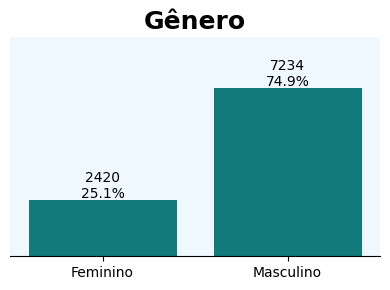

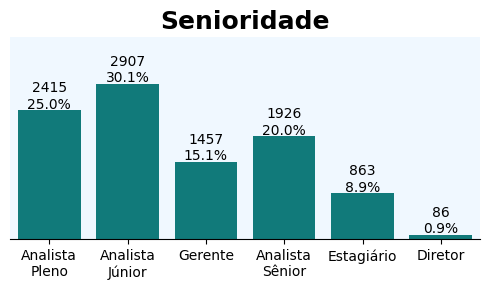

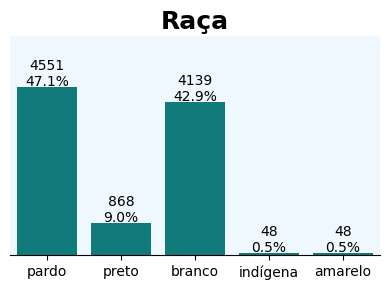

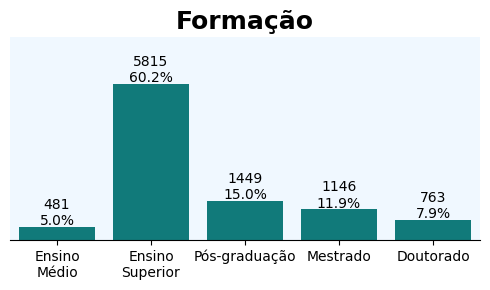

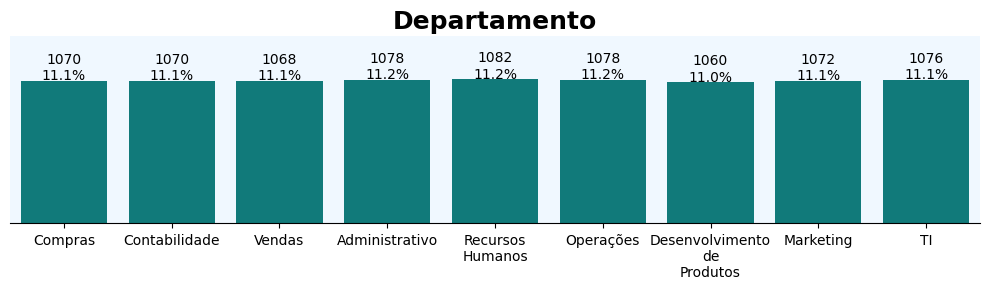

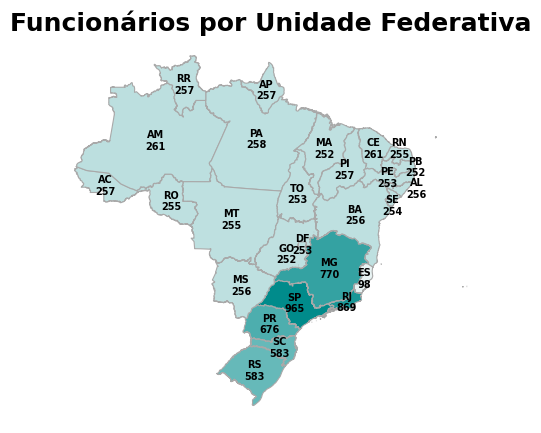

In [17]:
print("Exportação dos gráficos")
const_export_graficos(data)

print("Exportação do mapa")
const_export_mapa(data)